In [7]:
import requests
import os
from bs4 import BeautifulSoup

In [94]:
title='Gossiping'
r = requests.get(f"https://www.ptt.cc/bbs/{title}/index.html")

import requests
payload = {
'from': '/bbs/Gossiping/index.html',
'yes': 'yes'
}
rs = requests.session()
res = rs.post('https://www.ptt.cc/ask/over18',data = payload)
res = rs.get(f'https://www.ptt.cc/bbs/{title}/index.html')

soup = BeautifulSoup(res.text,"html.parser")
u = soup.select("div.btn-group btn-group-paging")#上一頁按鈕的a標籤
u = soup.select("div.btn-group.btn-group-paging a")#上一頁按鈕的a標籤
u[1]['href']

page_number=40

In [95]:
u = soup.select("div.btn-group.btn-group-paging a")#上一頁按鈕的a標籤
index=u[1]['href'].split('/')[-1]
latest_index=int(index.split('.')[0].replace('index',''))
print (latest_index)


38894


In [96]:

from PttWebCrawler.crawler import *
file_path=os.path.abspath("")
c = PttWebCrawler(as_lib=True)

file_name=c.parse_articles(latest_index-page_number, latest_index, title,path=file_path)

1618134373.A.524
Processing article: M.1618134398.A.FC5
Processing article: M.1618134418.A.A23
Processing article: M.1618134511.A.309
Processing article: M.1618134641.A.250
Processing article: M.1618134716.A.A6E
Processing article: M.1618134770.A.E42
Processing article: M.1618134801.A.A87
Processing article: M.1618134804.A.89E
Processing article: M.1618134883.A.D26
Processing article: M.1618134891.A.47F
Processing article: M.1618134987.A.FE1
Processing article: M.1618135014.A.85B
Processing article: M.1618135162.A.986
Processing article: M.1618135203.A.754
Processing article: M.1618135224.A.E36
Processing article: M.1618135269.A.818
Processing index: 38870
Processing article: M.1618135282.A.0AA
Processing article: M.1618135310.A.034
Processing article: M.1618135367.A.D8B
Processing article: M.1618135496.A.223
Processing article: M.1618135515.A.E1D
Processing article: M.1618135533.A.753
Processing article: M.1618135599.A.A8F
Processing article: M.1618135605.A.E47
Processing article: M.1

In [97]:
import os
# sys.path.append(f'{os.getcwd()}/my-nlp-wrangler')
file_name=f'{os.getcwd()}/{title}-{latest_index-page_number}-{latest_index}.json'

In [126]:
import json 
  
# Opening JSON file 
print (file_name)
f = open(file_name) 
data = json.load(f) 

/Users/claire/Desktop/tfidf_demo/Gossiping-38854-38894.json


In [127]:
import pandas as pd  


In [128]:
article_df=pd.json_normalize(data['articles'])
article_df.head(2)

,article_id,article_title,author,board,content,date,ip,messages,url,message_count.all,message_count.boo,message_count.count,message_count.neutral,message_count.push
0,M.1618121284.A.A50,Re: [新聞] 太魯閣號頭七過3天 蔡英文憂臉書「觸及,chirex (4%大魔導士),Gossiping,: https://news.tvbs.com.tw/politics/1491455 : ...,Sun Apr 11 14:08:00 2021,36.235.135.68,"[{'push_content': '高速公路警察怎麼取締酒駕 教一下吧', 'push_i...",https://www.ptt.cc/bbs/Gossiping/M.1618121284....,48,4,20,20,24
1,M.1618121459.A.843,[新聞] 太魯閣號事故遺骸DNA比對出爐 罹難者確認,Daniel0712 (阿呆),Gossiping,備註請放最後面 違者新聞文章刪除 1.媒體來源:CNA 2.記者署名: 李先鳳 3.完整新聞...,Sun Apr 11 14:10:57 2021,1.162.106.58,"[{'push_content': '-1', 'push_ipdatetime': '04...",https://www.ptt.cc/bbs/Gossiping/M.1618121459....,13,0,7,6,7


In [131]:
article_df.index.size
# article_df.info()

794

### 目前同一標題的文章數

In [133]:
count=article_df.groupby('article_title').count()
count[count['article_id']>1]['article_id']

article_title
Re: [問卦]  30歲沒交過女朋友到底是缺了什麼的八卦         2
Re: [問卦] 30歲不缺錢 不買房 不買車要幹嘛的八卦         3
Re: [問卦] =.= 為什麼有人想把台語叫閩南語？！         11
Re: [問卦] clubhouse怎麼不到兩個月就退燒了?        4
Re: [問卦] 俄國入侵烏克蘭，台灣能做什麼？              2
Re: [問卦] 台灣健保很屌  去日本買一堆藥?             3
Re: [問卦] 如果有人發明治療同性戀的方法會怎樣？           4
Re: [問卦] 小時候養蠶印象最深的是什麼                4
Re: [問卦] 很兇的女生  在台灣有市場嗎？              3
Re: [問卦] 有沒有純靠人氣卻沒才華的youtuber?        2
Re: [問卦] 李小龍梁朝偉周星馳張國榮成龍 誰最偉大?         2
Re: [問卦] 正常人水餃都吃幾個                    2
Re: [問卦] 為什麼人沒辦法輕鬆看待另一半出軌？            2
Re: [問卦] 為什麼日本連零食口感都贏台灣？              2
Re: [問卦] 為什麼童子功一定要處男才能練？              2
Re: [問卦] 為什麼結婚壓力幾乎都在男方?               4
Re: [問卦] 玩遊戲開始就殺了自己兄弟該怎麼辦？            2
Re: [問卦] 當兵時爸爸意外走了，心情該怎麼調適            2
Re: [問卦] 當兵時爸爸意外走了，心情該怎麼調適...         2
Re: [問卦] 第八截車廂 幸存的那個是不是超神的?           2
Re: [問卦] 綿羊料理太可愛了吧                    2
Re: [問卦] 美國教育不會萬物皆下品唯有讀書高？            2
Re: [問卦] 肥宅一直隨機搭訕有沒有可能脫單              2
Re: [問卦] 英國人和美國人怎麼分辨？                 3
Re: [問卦] 跟女生出去的第一天，就被暗示要幫她

In [138]:
# len(pd.unique(article_df['article_title']))
article_df=article_df.groupby(['article_title'],as_index=False). agg({'content': ' ,'.join})
article_df.index.size

673

## Clean Data

In [139]:
from mynlpwrangler.cleaner import ArticleCleaner
from mynlpwrangler.tokenizer import Tokenizer
import os

In [142]:
# article_df[col]=article_df[col].astype('str')

In [143]:
col='content'
next_col=f'{col}_new'
tokenized_column='tokenize_word'
ac=ArticleCleaner(col=col,cleaned_col='clean_sentence')
clean_data=ac.clean_data(setence_df=article_df)

In [144]:
clean_data.columns

Index(['article_title', 'content', 'clean_sentence'], dtype='object')

In [145]:
clean_data.head(10)

,article_title,content,clean_sentence
0,NaN,作者 ubcs (覺青年超冒險蓋) 看板 Gossiping 標題 [公告] 剃掉XX的我，...,作者 ubcs 覺青年超冒險蓋 看板 Gossiping 標題 公告 剃掉XX的我 ...
1,Re: [問卦] 30歲沒交過女朋友到底是缺了什麼的八卦,: 引述《aabbcc520 (U質文)》之銘言： : : yoyo : : 我成5啦 : ...,引述 aabbcc U質文 之銘言 yoyo 我成 啦 ...
2,Re: [問卦] 30歲不缺錢 不買房 不買車要幹嘛的八卦,: yoyo : 我成5拉 : 板上有沒有我這種人阿 : 今年30，很普通餓不死的工作 : ...,yoyo 我成 拉 板上有沒有我這種人阿 今年 很普通餓不死的工作 ...
3,Re: [問卦] 8+9怎麼把得到農會正妹行員？,農會是當地有背景的 不是權就是貴 不過你長的像金成武 背後一堆當地權貴阿姨要介紹正妹給你 你...,農會是當地有背景的 不是權就是貴 不過你長的像金成武 背後一堆當地權貴阿姨要介紹正妹給你 你...
4,Re: [問卦] 8+9是不是很會賺,這種生活的花用其實也不是啥乾淨的錢... 你去觀察這類人的家庭生活就常常錢不知從哪冒出來似的...,這種生活的花用其實也不是啥乾淨的錢 你去觀察這類人的家庭生活就常常錢不知從哪冒出來似的 天下...
5,Re: [問卦] =.= 為什麼有人想把台語叫閩南語？！,(這篇很長) 說到重點了 會硬要把台語稱為閩南語的 其中一種就是受大中國沙文影響太深 他們習...,這篇很長 說到重點了 會硬要把台語稱為閩南語的 其中一種就是受大中國沙文影響太深 他們習...
6,Re: [問卦] clubhouse怎麼不到兩個月就退燒了?,"這東西會紅才怪 我聽人說廢話 還不如去抖音刷短視頻 還比較有趣 迪斯口比這個好用多了吧 ,...",這東西會紅才怪 我聽人說廢話 還不如去抖音刷短視頻 還比較有趣 迪斯口比這個好用多了吧 當...
7,Re: [問卦] iCASH一卡通悠遊卡要選誰,如題我包恩 : 小魯三張都有 : 不過悠遊卡是Samsung pay裡面的還沒有使用過 : ...,如題我包恩 小魯三張都有 不過悠遊卡是Samsung pay裡面的還沒有使用過 ...
8,Re: [問卦] momo買冷氣,: 上網看了滿多家網拍也有去實體店面 : 看冷氣，發現momo價格最低，請問 : 在momo...,上網看了滿多家網拍也有去實體店面 看冷氣 發現momo價格最低 請問 在momo...
9,Re: [問卦] 一兩年換三四萬的手機，家電卻不換?,阿肥建議你啦 先買個老婆好嗎 贏馬不錯 可以買 贏馬會煮飯 還會做愛 另外我認真說三爽的事情...,阿肥建議你啦 先買個老婆好嗎 贏馬不錯 可以買 贏馬會煮飯 還會做愛 另外我認真說三爽的事情...


In [146]:
tk=Tokenizer(stop_word_path=f'{os.getcwd()}/stop_word.txt')
tk.tokenize_dataframe(clean_data,sentences_column=col,new_generate_column=tokenized_column)

,article_title,content,clean_sentence,tokenize_word
0,NaN,作者 ubcs (覺青年超冒險蓋) 看板 Gossiping 標題 [公告] 剃掉XX的我，...,作者 ubcs 覺青年超冒險蓋 看板 Gossiping 標題 公告 剃掉XX的我 ...,作者 ubcs 青年 超冒險 gossiping 標題 公告 剃掉 xx 然後撿 高中生 回...
1,Re: [問卦] 30歲沒交過女朋友到底是缺了什麼的八卦,: 引述《aabbcc520 (U質文)》之銘言： : : yoyo : : 我成5啦 : ...,引述 aabbcc U質文 之銘言 yoyo 我成 啦 ...,引述 aabbcc520 質文 之銘言 yoyo 我成 今年 30 到底 認識 女生 交友 ...
2,Re: [問卦] 30歲不缺錢 不買房 不買車要幹嘛的八卦,: yoyo : 我成5拉 : 板上有沒有我這種人阿 : 今年30，很普通餓不死的工作 : ...,yoyo 我成 拉 板上有沒有我這種人阿 今年 很普通餓不死的工作 ...,yoyo 我成 板上 這種 今年 30 普通 工作 不買房 不買 汽車 沒什麼 自然 缺錢 ...
3,Re: [問卦] 8+9怎麼把得到農會正妹行員？,農會是當地有背景的 不是權就是貴 不過你長的像金成武 背後一堆當地權貴阿姨要介紹正妹給你 你...,農會是當地有背景的 不是權就是貴 不過你長的像金成武 背後一堆當地權貴阿姨要介紹正妹給你 你...,農會 背景 成武 一堆 權貴 阿姨 介紹 正妹給 當真路邊 一個 阿貓 阿狗 當樁
4,Re: [問卦] 8+9是不是很會賺,這種生活的花用其實也不是啥乾淨的錢... 你去觀察這類人的家庭生活就常常錢不知從哪冒出來似的...,這種生活的花用其實也不是啥乾淨的錢 你去觀察這類人的家庭生活就常常錢不知從哪冒出來似的 天下...,這種 生活 花用 其實 乾淨 ... 觀察 這類 家庭 生活 常常 不知 ... 天下 白吃...
...,...,...,...,...
668,[爆卦] 中壢車站,現在外面一堆消防車 貌似有火警 就在剛剛而已 約有56輛消防車 詳細狀況不清楚 但推文說有自...,現在外面一堆消防車 貌似有火警 就在剛剛而已 約有 輛消防車 詳細狀況不清楚 但推文說有自...,現在 外面 一堆 消防 貌似 火警 剛剛 56 消防 詳細 狀況 清楚 推文 自強號 補字數...
669,[爆卦] 再不限制亂抽地下水 六月限水變斷水,台灣西部從桃園以南全部陷入限水危機 民生部分 政府僅在部分區域推出限2供5 高用水產業僅宣導...,台灣西部從桃園以南全部陷入限水危機 民生部分 政府僅在部分區域推出限 供 高用水產業僅宣導...,台灣 西部 從桃園 以南 陷入 限水 危機 民生 部分 政府 僅在 部分 區域 推出 用水 ...
670,[爆卦] 台北市3月各區人口,上月份台北市各區的戶籍人口出來了 台北市減少6218人，應該創下台灣各縣市單月人口最大跌幅 ...,上月份台北市各區的戶籍人口出來了 台北市減少 人 應該創下台灣各縣市單月人口最大跌幅 ...,月份 台北市 各區 戶籍 人口 台北市 減少 6218 應該 下台 灣各縣 市單 人口 最大...
671,[爆卦] 疫情整理0410:週六仍七十萬 日泰疫情連升,全球週六仍有70萬以上病例，這當中不含西班牙與瑞士，目前大約一天12000例。 泰國疫情再...,全球週六仍有 萬以上病例 這當中不含西班牙與瑞士 目前大約一天 例 泰國疫情再創...,全球 週六 70 病例 這當 西班牙 瑞士 大約 一天 12000 泰國 疫情 再創 近期 ...


In [147]:
clean_result=clean_data

## Count word

In [148]:
import numpy as np
def count_word_in_content(token_series):
    word_vector={}
    for index,text in enumerate(token_series.to_list()):
        word_list=text.split(' ')
        for word in word_list:
            if word not in word_vector:
                word_vector[word]={}
                word_vector[word][index]=1
            elif index not in word_vector[word]:
                word_vector[word][index]=1
            else:
                word_vector[word][index]+=1
    word_vector_list=[]
    for word,key in word_vector.items():
        for index,number in key.items():
            word_vector_list.append([word,index,number])
    word_vector_df=pd.DataFrame(data=word_vector_list,columns=['word','index','number'])
    return word_vector_df

In [149]:
word_vector_df=count_word_in_content(clean_result[tokenized_column])
word_vector_df.head(5)

,word,index,number
0,作者,0,13
1,作者,7,2
2,作者,119,1
3,作者,120,1
4,作者,123,1


In [150]:
content_count_term=word_vector_df.groupby('word').count()['index'].reset_index()
content_count_term=content_count_term.rename(columns={'index':'content_count_term'})

In [151]:
word_vector_df=pd.merge(word_vector_df,content_count_term,on='word',how='left')
word_vector_df.head(5)

,word,index,number,content_count_term
0,作者,0,13,11
1,作者,7,2,11
2,作者,119,1,11
3,作者,120,1,11
4,作者,123,1,11


In [152]:
word_vector_df['tf']=word_vector_df['number']
ttl_info=len(pd.unique(word_vector_df['index']))
word_vector_df['idf']=np.log(ttl_info/word_vector_df['content_count_term'])+1

In [153]:
word_vector_df['tfidf_manual']=word_vector_df['tf']*word_vector_df['idf']

In [154]:
word_vector_df[word_vector_df['index']==0].head()

,word,index,number,content_count_term,tf,idf,tfidf_manual
0,作者,0,13,11,13,5.113850,66.480051
11,ubcs,0,39,1,39,7.511745,292.958068
12,青年,0,1,3,1,6.413133,6.413133
15,超冒險,0,1,1,1,7.511745,7.511745
16,gossiping,0,29,6,29,5.719986,165.879590


## Checkout Count

In [155]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from scipy.sparse import coo_matrix

In [156]:
cv = CountVectorizer()
word_matrix = cv.fit_transform(clean_result[tokenized_column].tolist())


In [157]:
text_dict=dict()
feature_name=cv.get_feature_names()
feature_name_df=pd.DataFrame(data=enumerate(feature_name),columns=['col_index','word'])

In [158]:
tmp=coo_matrix(word_matrix)
tf_df=pd.DataFrame({'index': tmp.row, 'col_index': tmp.col, '_tf': tmp.data} )[['index', 'col_index', '_tf']]
td_df=pd.merge(tf_df,feature_name_df,on='col_index',how='left')

In [159]:
compare_tf=pd.merge(word_vector_df,td_df,on=['index','word'],how='outer')
compare_tf[compare_tf['_tf']!=compare_tf['tf']].index.size

359

## Checkout idf

In [160]:
tfidf_transformer = TfidfVectorizer(norm=None, smooth_idf=False )
tfidf_matrix=tfidf_transformer.fit_transform(clean_result[tokenized_column].to_list())

In [161]:
idf_dict=pd.DataFrame(zip(tfidf_transformer.get_feature_names(),tfidf_transformer.idf_),columns=['word','_idf'])
idf_dict.head(10)

,word,_idf
0,00,5.432304
1,01,6.413133
2,02,6.413133
3,03,7.511745
4,04,4.621374
5,0402,6.818598
6,05,6.413133
7,052d,7.511745
8,055,7.511745
9,06,6.413133


In [162]:
## checkcout 
##的值是否一樣 :不一樣的會吐出來
idf_dict
check_idf=pd.merge(word_vector_df,idf_dict,on='word',how='left')
check_idf[check_idf['idf']!=check_idf['_idf']].index.size

690

## 使用tfidf

In [163]:
from sklearn.feature_extraction.text import TfidfTransformer
clean_result_df=clean_result[~clean_result[tokenized_column].isnull()]
def textFeatureExtraction(token_data):
    cv = CountVectorizer()
    # 將文字中的詞語轉換為詞頻矩陣，矩陣元素a[i][j] 表示j詞在i類文字下的詞頻
    word_matrix = cv.fit_transform(token_data)
    vocab = pd.DataFrame(cv.get_feature_names(), columns=['word'])
    vocab['col_index'] = vocab.index
    # 統計每一個詞語的tf-idf權值
    tfidf_transformer = TfidfTransformer(norm=None, smooth_idf=False,use_idf=True)
    tfidf_matrix = tfidf_transformer.fit_transform(word_matrix)
    return word_matrix, tfidf_matrix, vocab
word_matrix, tfidf_matrix, vocab = textFeatureExtraction( clean_result_df[tokenized_column])

In [164]:
tmp = coo_matrix(tfidf_matrix)
result= pd.DataFrame({'index': tmp.row, 'col_index': tmp.col, 'tfidf': tmp.data} )[['index', 'col_index', 'tfidf']].sort_values(['index', 'col_index'])
tfidf_result = pd.merge(result, vocab, on='col_index', how='left')
tfidf_result = tfidf_result[['index', 'word', 'tfidf']]
tfidf_result.to_csv('result.csv')
sorted_tf_idf=tfidf_result.sort_values(by='tfidf',ascending=False)
clean_result_df=clean_result_df.reset_index()
clean_result_df['index']=clean_result_df.index

In [165]:
# clean_result_df.head(2)

In [166]:
result=pd.merge(sorted_tf_idf,clean_result_df[['article_title','index',col,tokenized_column]],how='left',on='index').sort_values(by=['index','tfidf'],ascending=False)
tfidf_Top10=result.groupby('index').head(10)

In [167]:
tfidf_Top10.head(2)

,index,word,tfidf,article_title,content,tokenize_word
32,672,晶片,128.634470,[爆卦] 荷小編-歐洲有機會贏得晶片之戰嗎？,https://bit.ly/2QcEn3h 歐洲在強大的電腦晶片之戰中：你認為它有機會嗎？...,2qcen3h 歐洲 強大 電腦 晶片 之戰 認為 機會 全球 電腦 晶片 行業 短缺 現象...
87,672,歐洲,82.632304,[爆卦] 荷小編-歐洲有機會贏得晶片之戰嗎？,https://bit.ly/2QcEn3h 歐洲在強大的電腦晶片之戰中：你認為它有機會嗎？...,2qcen3h 歐洲 強大 電腦 晶片 之戰 認為 機會 全球 電腦 晶片 行業 短缺 現象...


In [168]:
tfidf_Top10_agg_word=tfidf_Top10.groupby(['article_title','index',col,tokenized_column],as_index=False). agg({'word': ' ,'.join})
tfidf_Top10_agg_word.head(10)

,article_title,index,content,tokenize_word,word
0,Re: [問卦] 30歲沒交過女朋友到底是缺了什麼的八卦,1,: 引述《aabbcc520 (U質文)》之銘言： : : yoyo : : 我成5啦 : ...,引述 aabbcc520 質文 之銘言 yoyo 我成 今年 30 到底 認識 女生 交友 ...,"拖鞋 ,短褲 ,交友 ,軟體 ,沒機會 ,妹子 ,女生 ,正妹 ,外國 ,打扮"
1,Re: [問卦] 30歲不缺錢 不買房 不買車要幹嘛的八卦,2,: yoyo : 我成5拉 : 板上有沒有我這種人阿 : 今年30，很普通餓不死的工作 : ...,yoyo 我成 板上 這種 今年 30 普通 工作 不買房 不買 汽車 沒什麼 自然 缺錢 ...,"工作 ,板上 ,覺得 ,不買房 ,人生 ,聚會 ,台北 ,分享 ,有類 ,還沒嫖過"
2,Re: [問卦] 8+9怎麼把得到農會正妹行員？,3,農會是當地有背景的 不是權就是貴 不過你長的像金成武 背後一堆當地權貴阿姨要介紹正妹給你 你...,農會 背景 成武 一堆 權貴 阿姨 介紹 正妹給 當真路邊 一個 阿貓 阿狗 當樁,"成武 ,正妹給 ,當真路邊 ,當樁 ,權貴 ,農會 ,阿狗 ,阿貓 ,背景 ,介紹"
3,Re: [問卦] 8+9是不是很會賺,4,這種生活的花用其實也不是啥乾淨的錢... 你去觀察這類人的家庭生活就常常錢不知從哪冒出來似的...,這種 生活 花用 其實 乾淨 ... 觀察 這類 家庭 生活 常常 不知 ... 天下 白吃...,"這類 ,加九 ,乾淨 ,本肥 ,身邊 ,這種 ,家庭 ,生活 ,錢進 ,野狗"
4,Re: [問卦] =.= 為什麼有人想把台語叫閩南語？！,5,(這篇很長) 說到重點了 會硬要把台語稱為閩南語的 其中一種就是受大中國沙文影響太深 他們習...,這篇 很長 重點 台語 南語 一種 受大中國 沙文 影響 太深 習慣 台灣化 台灣 中國 一...,"台語 ,閩南語 ,南語 ,台灣 ,語言 ,原住民 ,xd ,漳州 ,國語 ,華北話"
5,Re: [問卦] clubhouse怎麼不到兩個月就退燒了?,6,"這東西會紅才怪 我聽人說廢話 還不如去抖音刷短視頻 還比較有趣 迪斯口比這個好用多了吧 ,...",這東 西會 紅才 廢話 音刷 短視頻 還比較 有趣 迪斯口 當初 菁英 人士 問題 社會 菁...,"短視頻 ,紅才 ,西會 ,音刷 ,迪斯口 ,退燒 ,廢話 ,這東 ,還比較 ,菁英"
6,Re: [問卦] iCASH一卡通悠遊卡要選誰,7,如題我包恩 : 小魯三張都有 : 不過悠遊卡是Samsung pay裡面的還沒有使用過 : ...,如題 包恩 小魯三張 悠遊卡 samsung pay 裡面 還沒有 使用 覺得 icash ...,"大哭 ,悠遊卡 ,lyanwu ,stupidclown ,一卡通 ,游泳 ,電子 ,作者 ..."
7,Re: [問卦] momo買冷氣,8,: 上網看了滿多家網拍也有去實體店面 : 看冷氣，發現momo價格最低，請問 : 在momo...,上網 多家 網拍 實體 店面 看冷氣 發現 momo 價格 最低 請問 momo 冷氣 注意...,"momo ,冷氣 ,網拍 ,看冷氣 ,玉山 ,燦坤購 ,店面 ,冷氣安裝 ,實體 ,上網"
8,Re: [問卦] 一兩年換三四萬的手機，家電卻不換?,9,阿肥建議你啦 先買個老婆好嗎 贏馬不錯 可以買 贏馬會煮飯 還會做愛 另外我認真說三爽的事情...,阿肥 建議 先買個 老婆 贏馬 不錯 贏馬會 還會 認真 三爽 事情 阿肥 本來 note1...,"三爽 ,阿肥 ,蘋果 ,宰羊 ,安卓的確 ,安卓 ,太甚 ,先買個 ,星粉 ,有潮"
9,Re: [問卦] 一直嘴少子化卻不趕快結婚生子??,10,: 欸欸 : 想問一下版上金城武.300萬們 : 為何一直嘴少子化擔心造成台灣危機 : 卻不...,想問 一下 版上 金城武 300 萬們 一直 少子 化擔 造成 台灣 危機 趕快 婚生子 鍵...,"普妹 ,洗澡 ,只會 ,正妹 ,還睡 ,連已 ,萬們 ,阿說 ,阿對 ,鍵盤"


In [169]:
tfidf_Top10_agg_word.to_csv('tfidf_Top10_agg_word.csv', encoding='utf_8_sig')

In [170]:
count_tag=tfidf_Top10.groupby('word').count()
word_list=count_tag[count_tag['index']>10].sort_values('index',ascending=False).index.tolist()

In [171]:
count_tag.sort_values('index',ascending=False).head(10)

,index,tfidf,article_title,content,tokenize_word
word,,,,,
台灣,27,27,27,27,27
中國,17,17,17,17,17
問卦,15,15,15,15,15
新聞,13,13,13,13,13
一個,13,13,13,13,13
日本,12,12,12,12,12
肥宅,11,11,11,11,11
正妹,11,11,11,11,11
女生,10,10,10,10,10


In [172]:
def generate_tag_table(df,column):
    tag_table=pd.DataFrame(pd.unique(df[column]),columns=['tag_value'])
#     tag_table['tag_id']=tag_table.index
    return tag_table

## 文字雲

In [173]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [174]:
wc = WordCloud(
  background_color='black',        #   背景顏色
  max_words=200,                   #   最大分詞數量
  mask=None,                       #   背景圖片
  max_font_size=None,              #   顯示字體的最大值
#   stopwords=STOPWORDS.add(stopword),   #   使用內置的屏蔽詞，再添加一個
#   font_path=font_path,             #   若為中文則需引入中文字型(.TTF)
  random_state=None,               #   隨機碼生成各分詞顏色
  prefer_horizontal=0.9)           #   調整分詞中水平和垂直的比例

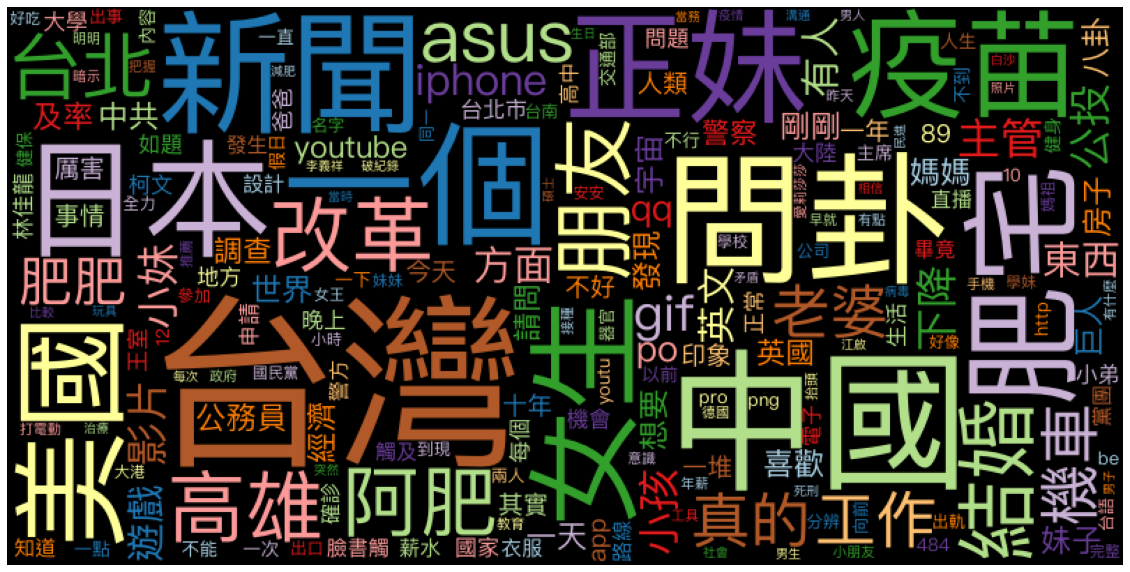

In [175]:
font_path="/System/Library/fonts/PingFang.ttc" # 標楷體

wc = WordCloud(background_color='black',font_path=font_path,height=400,width=800,colormap='Paired')
wc.fit_words(count_tag['index'].to_dict())
import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
plt.imshow(wc)
plt.axis("off")
plt.show()


In [76]:
tfidf_Top10[tfidf_Top10['word']=='大乘']

,index,word,tfidf,article_title,messages,tokenize_word


In [ ]:
大成